In [1]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
from datetime import date
%matplotlib inline

In [4]:
start = date(2014, 1,1)
end = date.today()

In [6]:
portfolio = ['AAPL', 'MSFT', "GE", "BAC", "VZ"]
data = pd.DataFrame()
for co in portfolio:
    data[co] = web.DataReader(co, "google", start, end)['Close']
data.head()

,AAPL,MSFT,GE,BAC,VZ
Date,,,,,
2014-01-02,79.02,37.16,27.50,16.10,49.00
2014-01-03,77.28,36.91,27.48,16.41,48.42
2014-01-06,77.70,36.13,27.26,16.66,48.69
2014-01-07,77.15,36.41,27.29,16.50,49.30
2014-01-08,77.64,35.76,27.21,16.58,48.50


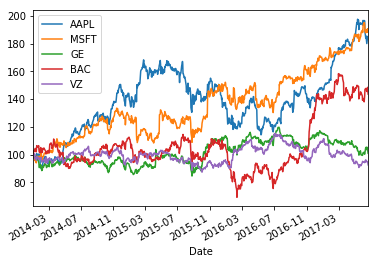

In [7]:
(data/data.iloc[0] * 100).plot()

In [12]:
returns = np.log(data/data.shift(1))
returns.tail()

,AAPL,MSFT,GE,BAC,VZ
Date,,,,,
2017-06-15,-0.006011,-0.005279,0.008676,-0.009302,-0.001071
2017-06-16,-0.014099,0.001430,0.002071,-0.004684,-0.000214
2017-06-19,0.028206,0.012352,-0.006920,0.020280,-0.001288
2017-06-20,-0.009130,-0.013639,-0.023539,-0.017722,-0.013620
2017-06-21,0.005913,0.005136,-0.012520,-0.015444,-0.011604


In [14]:
returns.mean() * 252

AAPL    0.176953
MSFT    0.183909
GE      0.002924
BAC     0.104585
VZ     -0.021964
dtype: float64

In [15]:
returns.cov() * 252

,AAPL,MSFT,GE,BAC,VZ
AAPL,0.053860,0.022609,0.013982,0.019826,0.009199
MSFT,0.022609,0.049993,0.016888,0.023231,0.013100
GE,0.013982,0.016888,0.031621,0.023457,0.010912
BAC,0.019826,0.023231,0.023457,0.069688,0.009550
VZ,0.009199,0.013100,0.010912,0.009550,0.024272


In [19]:
noa = len(portfolio)
weights = np.random.random(noa)
weights /= np.sum(weights)
weights

array([ 0.02605769,  0.37248284,  0.0330034 ,  0.39369111,  0.17476495])

In [21]:
expected_return = np.sum(returns.mean() * weights) * 252
expected_return

0.11054590156171745